# **To Detect and anonymize faces in the portrait of the Shelby Family**
The main idea is to Detect faces at first and apply a blur filter for each extracted region excpet for the face of Thomas Shelby.

So, Let us implement face recognition using OpenCV.

First, let's import the OpenCV library and install the face recognition library created by Adam Geitgey, which conatins all the functionalities required for facial recognition.

In [ ]:
import cv2

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 9.9 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=e033cf7b28dce2a500db9cde230f3cc2d2eb6095c8fd8a5f76c4a567eb4d24f8
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
from google.colab.patches import cv2_imshow #used to view the annotated images in colab

An image of ***Thomas Shelby*** from the internet is used to learn the facial encodings.

In [ ]:
imgShelby = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/Shelby.jpg')
imgShelby = cv2.cvtColor(imgShelby, cv2.COLOR_BGR2RGB)

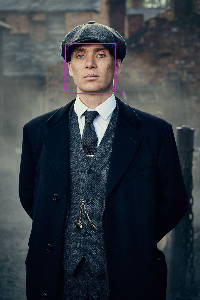

In [ ]:
faceLoc = face_recognition.face_locations(imgShelby)[0]
encodeShelby = face_recognition.face_encodings(imgShelby)[0]
cv2.rectangle(imgShelby,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
imgShelby = cv2.resize(imgShelby, (200,300))
cv2_imshow(imgShelby)

The *encodeShelby* contains the extracted facial features which will be later used for comparison. The *faceLoc* is used to extract the coordinates, hence draw the bounding box.

In [ ]:
imgShelbyTest = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/ShelbyTest.jpg')
imgShelbyTest = cv2.cvtColor(imgShelbyTest, cv2.COLOR_BGR2RGB)

An other image from the internet is used to test if the encodings stored in the *encodeShelby* can be used to test other images of Shelby and in other orientations.

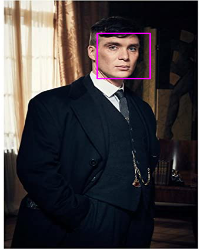

In [ ]:
faceLoc = face_recognition.face_locations(imgShelbyTest)[0]
encodeShelbyTest = face_recognition.face_encodings(imgShelbyTest)[0]
cv2.rectangle(imgShelbyTest,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
imgShelbyTest = cv2.resize(imgShelbyTest, (200,250))
cv2_imshow(imgShelbyTest)

In [ ]:
results = face_recognition.compare_faces([encodeShelby],encodeShelbyTest)
faceDis = face_recognition.face_distance([encodeShelby],encodeShelbyTest)
print(results,faceDis)

[True] [0.37622254]


The encodings of the face from the test image is used to compare with our original *encodeShelby* and the results above show that the extracted facial encodings can be used to detect the face of Thomas Shelby.

So, now that we have the facial encodings ready, we could move into the next step of our process. 


**2. Detection of all faces from the given portrait**

Loading of the test image:

In [ ]:
imgTest = face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/peakyblinders.jpg')
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

The locations of all the faces are stored in *facesLoc* as a List of tuples. The corresponding encodings of each face are also stored as an array of vectors.

In [ ]:
facesLoc = face_recognition.face_locations(imgTest)
encodeTest = face_recognition.face_encodings(imgTest, facesLoc)

In this task, Gaussian blur is used, which depends on the width and the height of the original image. So the kernel width and the height are calculated here.

In [ ]:
h, w = imgTest.shape[:2]
kernel_width = (w // 7) | 1
kernel_height = (h // 7) | 1

So, the actual process starts here:

The facial encodings extrated for each face from the test image is used to compare with the original *encodingShelby* extractions.

The result from the face_comapre() is used here. If it comes out to be False, Gaussian blur is applied. Else, the blurring is not done, which means it encountered the face of Thomas Shelby. 

In [ ]:
print('Number of faces detected:',len(facesLoc))

Number of faces detected: 7


In [ ]:
for i in range(len(facesLoc)):
  results = face_recognition.compare_faces([encodeShelby],encodeTest[i])
  if results == [False]:
    face = imgTest[facesLoc[i][0]: facesLoc[i][2], facesLoc[i][3]: facesLoc[i][1]]
    imgTest[facesLoc[i][0]: facesLoc[i][2], facesLoc[i][3]: facesLoc[i][1]] = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)

So, we see that all faces were detected and all faces BUT of Thomas Shelby was blurred.

*Voila*

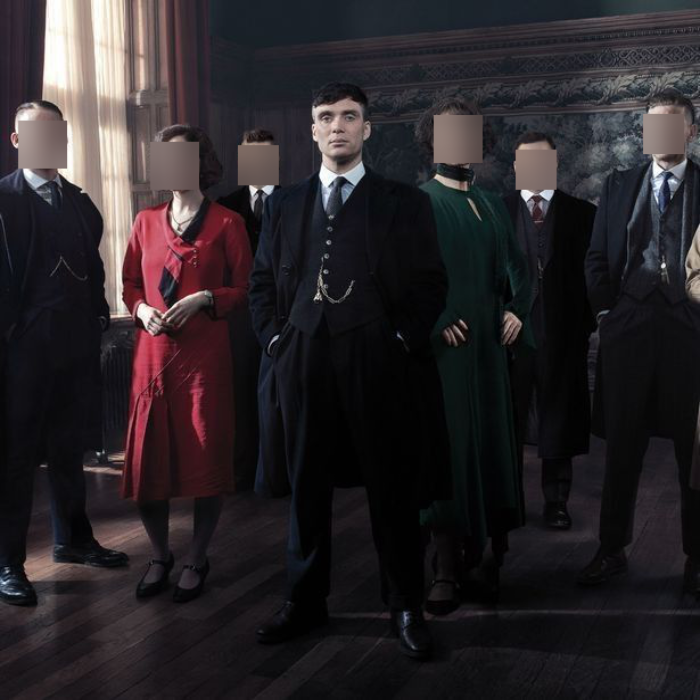

In [ ]:
imgTest = cv2.resize(imgTest, (700,700))
cv2_imshow(imgTest)

Alternate approach tried but didn't have the time and the resources to go through w it:

Develop a Custom dataset with bounding box annotations with two classes namely: Shelby and Not Shelby. The annotations could be done using LabelImg or other open-source repos.

Once done w the dataset, a YOLOv3 or YOLOv4 model could be devloped using the Darknet framework and trained for few thousand iterations.

So, once classifying the objects/face (i.e. Shelby and Not Shelby), a gaussian blur could be applied only on the 'Not Shelby' class. 